# Brooklyn 99 Episode Analysis

“I’m a detective. I will detect.” — Sergeant Terry Jeffords

The data is sourced from Kaggle and can be found here https://www.kaggle.com/bcruise/brooklyn-99-episode-data?select=brooklyn99_episodes.csv.

![title](brooklyn-nine-nine.jpg)

[Image Source](https://www.google.com/url?sa=i&url=https%3A%2F%2Fdeadline.com%2F2018%2F05%2Fbrooklyn-nine-nine-cast-seth-meyers-more-exult-over-nbc-pickup-1202389183%2F&psig=AOvVaw3vLvXGA8AroljR0VBH4yah&ust=1638934909040000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCND_ybri0PQCFQAAAAAdAAAAABAD)

In this notebook, I want to analyze episodes of one of my favorite shows - Brooklyn 99. The datasets I've chosen have information about viewership, general plot and IMDB popularity. I want to see if there's a correlation between the characters in the show and the popularity of the show. 

My hypothesis is that episodes that have the whole squad involved are the most popular since the dynamic between them is what *makes the show hilarious*. 

### Step 1: Importing the relevant tables + data 

In [3]:
# importing packages we'll use for the data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# importing the first table
Ratings = pd.read_csv("B99_Ratings.csv")
display(Ratings)

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers
0,1,1,1,Pilot,Phil Lord & Christopher Miller,Dan Goor & Michael Schur,2013-09-17,101.0,6170000.0
1,1,2,2,The Tagger,Craig Zisk,Norm Hiscock,2013-09-24,102.0,4030000.0
2,1,3,3,The Slump,Julie Anne Robinson,Prentice Penny,2013-10-01,105.0,3430000.0
3,1,4,4,M.E. Time,Troy Miller,Gil Ozeri,2013-10-08,106.0,3340000.0
4,1,5,5,The Vulture,Jason Ensler,Laura McCreary,2013-10-15,104.0,3430000.0
...,...,...,...,...,...,...,...,...,...
148,8,6,149,The Set Up,Maggie Carey,Jess Dweck & Nick Perdue,2021-08-26,805.0,1450000.0
149,8,7,150,Game of Boyles,Thembi Banks,Paul Welsh & Madeline Walter,2021-09-02,806.0,1840000.0
150,8,8,151,Renewal,Beth McCarthy Miller,Stephanie A. Ritter & Beau Rawlins,2021-09-02,807.0,1310000.0
151,8,9,152,The Last Day Pt 1,Linda Mendoza,Luke Del Tredici & Audrey E. Goodman,2021-09-16,809.0,1880000.0


In [5]:
# importing the 2nd table 
IMDB = pd.read_csv("B99_IMDB.csv")
display(IMDB)

,season,episode_num,title,original_air_date,imdb_rating,total_votes,desc
0,1,1,Pilot,17 Sep. 2013,7.8,4678,Detective Jake Peralta finds his work scrutini...
1,1,2,The Tagger,24 Sep. 2013,7.5,3818,"When Jake arrives late for work, Captain Holt ..."
2,1,3,The Slump,1 Oct. 2013,7.6,3576,"With a backlog of unsolved cases, Jake finds h..."
3,1,4,M.E. Time,8 Oct. 2013,7.7,3458,"Jake meets an attractive Medical Examiner, but..."
4,1,5,The Vulture,15 Oct. 2013,8.0,3353,A detective from Major Crimes takes over Jake'...
...,...,...,...,...,...,...,...
148,8,6,The Set Up,26 Aug. 2021,6.8,1489,"When the FBI takes over a high-profile case, J..."
149,8,7,Game of Boyles,2 Sep. 2021,8.1,1244,"Terry, Jake and Charles visit the Boyle Family..."
150,8,8,Renewal,2 Sep. 2021,8.2,1178,The squad comes together to work an important ...
151,8,9,The Last Day Pt 1,16 Sep. 2021,9.4,2088,The squad takes stock of their eight years tog...


### Step 2: Assess Available Data

![SegmentLocal](giphy.gif "segment")

[Image Source](https://www.google.com/url?sa=i&url=https%3A%2F%2Fgiphy.com%2Fexplore%2Fgina-99&psig=AOvVaw3hFNQLIN1jT0Rv-s6GpzOi&ust=1638935063792000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCMjitYXj0PQCFQAAAAAdAAAAABAD)

In [6]:
# lets look at the descriptive statistics 
Ratings.describe()

,season,episode_num_in_season,episode_num_overall,prod_code,us_viewers
count,153.000000,153.000000,153.000000,153.000000,1.530000e+02
mean,4.013072,10.640523,77.000000,411.947712,2.620719e+06
std,2.121280,6.294959,44.311398,210.602294,1.382498e+06
min,1.000000,1.000000,1.000000,101.000000,1.310000e+06
25%,2.000000,5.000000,39.000000,217.000000,1.840000e+06
50%,4.000000,10.000000,77.000000,409.000000,2.240000e+06
75%,6.000000,16.000000,115.000000,603.000000,3.110000e+06
max,8.000000,23.000000,153.000000,810.000000,1.507000e+07


You can see the following from the Ratings table descriptive statistics:

1. there's a total of 8 seasons 
2. the max number of episodes in a season was 23 
3. theres 153 episodes total
4. the max number of U.S. viewers was about 15M while the min number of viewers was about 1M 

In [7]:
# this Ratings table has the following columns 
Ratings.columns

Index(['season', 'episode_num_in_season', 'episode_num_overall', 'title',
       'directed_by', 'written_by', 'original_air_date', 'prod_code',
       'us_viewers'],
      dtype='object')

In [8]:
# the production code column will likely be irrelevant so we will remove this column 
Ratings = Ratings.drop(columns = ["prod_code"], axis = 1)
display(Ratings)

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,us_viewers
0,1,1,1,Pilot,Phil Lord & Christopher Miller,Dan Goor & Michael Schur,2013-09-17,6170000.0
1,1,2,2,The Tagger,Craig Zisk,Norm Hiscock,2013-09-24,4030000.0
2,1,3,3,The Slump,Julie Anne Robinson,Prentice Penny,2013-10-01,3430000.0
3,1,4,4,M.E. Time,Troy Miller,Gil Ozeri,2013-10-08,3340000.0
4,1,5,5,The Vulture,Jason Ensler,Laura McCreary,2013-10-15,3430000.0
...,...,...,...,...,...,...,...,...
148,8,6,149,The Set Up,Maggie Carey,Jess Dweck & Nick Perdue,2021-08-26,1450000.0
149,8,7,150,Game of Boyles,Thembi Banks,Paul Welsh & Madeline Walter,2021-09-02,1840000.0
150,8,8,151,Renewal,Beth McCarthy Miller,Stephanie A. Ritter & Beau Rawlins,2021-09-02,1310000.0
151,8,9,152,The Last Day Pt 1,Linda Mendoza,Luke Del Tredici & Audrey E. Goodman,2021-09-16,1880000.0


In [9]:
IMDB.describe()

,season,episode_num,imdb_rating,total_votes
count,153.000000,153.000000,153.000000,153.000000
mean,4.013072,10.640523,8.127451,2503.431373
std,2.121280,6.294959,0.583798,664.477305
min,1.000000,1.000000,4.800000,1178.000000
25%,2.000000,5.000000,7.800000,2088.000000
50%,4.000000,10.000000,8.100000,2364.000000
75%,6.000000,16.000000,8.500000,2743.000000
max,8.000000,23.000000,9.600000,6225.000000


### Step 3: Clean Up Available Data

The episode_num column from the IMDB table matches the episode_num_in_season column from the Ratings table

The two tables can probably be joined using season & epsiode 

In [10]:
IMDB_Ratings = Ratings.merge(IMDB, how = "inner", left_on = ["season", "episode_num_in_season"], right_on = ["season", "episode_num"])

In [11]:
display(IMDB_Ratings.head(2))

,season,episode_num_in_season,episode_num_overall,title_x,directed_by,written_by,original_air_date_x,us_viewers,episode_num,title_y,original_air_date_y,imdb_rating,total_votes,desc
0,1,1,1,Pilot,Phil Lord & Christopher Miller,Dan Goor & Michael Schur,2013-09-17,6170000.0,1,Pilot,17 Sep. 2013,7.8,4678,Detective Jake Peralta finds his work scrutini...
1,1,2,2,The Tagger,Craig Zisk,Norm Hiscock,2013-09-24,4030000.0,2,The Tagger,24 Sep. 2013,7.5,3818,"When Jake arrives late for work, Captain Holt ..."


Theres repeated & unnecessary columns here, lets fix them by:

1. remove the extra episode_num, title_y, original_air_date_y 
2. rename the columns for clairty 

In [12]:
IMDB_Ratings = IMDB_Ratings.drop(columns = ["episode_num", "title_y", "original_air_date_y"])

In [13]:
IMDB_Ratings = IMDB_Ratings.rename(columns = {"desc": "description", "title_x" : "episode_title", "original_air_date_x" : "air_date", "us_viewers" : "num_viewers"})

In [14]:
IMDB_Ratings.head(1)

,season,episode_num_in_season,episode_num_overall,episode_title,directed_by,written_by,air_date,num_viewers,imdb_rating,total_votes,description
0,1,1,1,Pilot,Phil Lord & Christopher Miller,Dan Goor & Michael Schur,2013-09-17,6170000.0,7.8,4678,Detective Jake Peralta finds his work scrutini...


### Step 4: Begin Analyzing Data 

My hypothesis is that episodes with the entire squad together are the epsiodes with the most viewership throughout the seasons 

<AxesSubplot:xlabel='episode_num_overall', ylabel='num_viewers'>

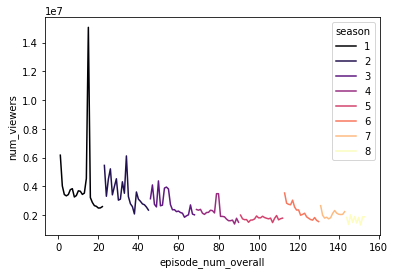

In [15]:
# lets look at the regular progression of U.S. veiwership throughuout the run of the show

sns.lineplot(data=IMDB_Ratings, y="num_viewers", hue = "season", x = "episode_num_overall", legend = "full", palette = "magma")

<AxesSubplot:xlabel='season', ylabel='episode_num_in_season'>

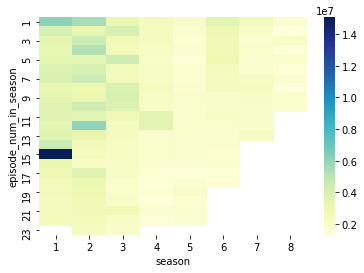

In [16]:
sns.heatmap(IMDB_Ratings.pivot("episode_num_in_season", "season", "num_viewers"), cmap="YlGnBu")

The graph shows the following 
1. episode 15 from season 1 is a bizarre outlier - lets inspect that in the next few steps 
2. generally, the trend seems to show that number of viewers have decreased as the seasons have progressed 
3. the trend also shows seasons get less viewership as the season progresses (aside from season 1 clearly)

![SegmentLocal](b99-brooklyn99.gif "segment")

[Image Source](https://www.google.com/url?sa=i&url=https%3A%2F%2Ftenor.com%2Fview%2Fb99-brooklyn99-jake-peralta-tell-me-why-what-gif-11691381&psig=AOvVaw3hFNQLIN1jT0Rv-s6GpzOi&ust=1638935063792000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCMjitYXj0PQCFQAAAAAdAAAAABAP)

In [17]:
# lets see what the episode with the oddly high amount of viewership is 

IMDB_Ratings[IMDB_Ratings["num_viewers"] == max(IMDB_Ratings["num_viewers"])]

,season,episode_num_in_season,episode_num_overall,episode_title,directed_by,written_by,air_date,num_viewers,imdb_rating,total_votes,description
14,1,15,15,Operation: Broken Feather,Julie Anne Robinson,Dan Goor & Michael Schur,2014-02-02,15070000.0,8.2,3022,Jake is hurt when Amy tells him that she is co...


Interesting...I cant even remember what happened in this episode to be honest. 

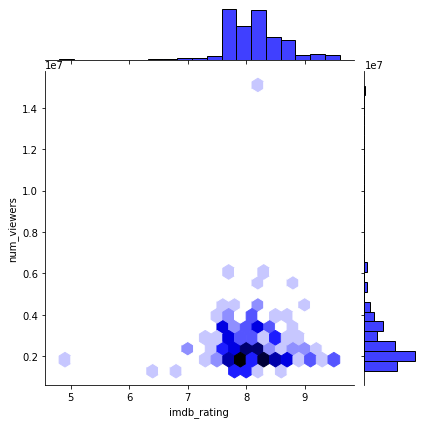

In [18]:
# lets see if the IMBD ratings correspond to the viewership in any way

sns.jointplot(data=IMDB_Ratings, y="num_viewers", x = "imdb_rating", kind = "hex", color = "b")

This graph reveals that there isnt a strict linear relationship between IMDB rating and the number of viewers

It does show however, the highest IMDB rated episodes seem to be the episodes that have the typical viewership of about 2M viewers

#### Character Analysis

Lets do some character analysis

The description has the characters involved in each episode. Whats that now? Not every character in the episode might be mentioned in the description. 

Fair point. We're just gonna mention that as a little flaw in this process and then move on. 

In [19]:
# lets take a look at a few descriptions 

display(IMDB_Ratings["description"].head(10))

0    Detective Jake Peralta finds his work scrutini...
1    When Jake arrives late for work, Captain Holt ...
2    With a backlog of unsolved cases, Jake finds h...
3    Jake meets an attractive Medical Examiner, but...
4    A detective from Major Crimes takes over Jake'...
5    Jake makes a foolish bet with Holt that he can...
6    Jake stupidly arrests a male suspect despite h...
7    Jake is horrified when his hero, Jimmy Brogan,...
8    Jake's favorite pizza place burns down and he ...
9    Amy hosts a Thanksgiving dinner at her apartme...
Name: description, dtype: object

Sadly it looks like the descriptions have been cut off in the table - oh well, we'll just have to work through what we have

This may help narrow down the main character in the story so we'll go with that. 

In [20]:
# we need to make a dictionary of the characters first in order to trace all variations of character names back to the normalized character name 
#I've done this manually but it may be easily extracted from the HTML of IMDB or something 

character_list1 = {"jake": ["jake peralta", "jake", "peralta"], "amy" : ["amy santiago", "amy", "santiago"],\
                  "rosa": ["rosa diaz", "diaz", "rosa"] , "gina": ["linetti", "gina linetti", "gina"], \
                  "raymond": ["raymond holt", "holt", "raymond"], "charles" : ["charles boyle", "charles", 'boyle'],\
                  "scully" : ["scully"], "doug":["doug judy","judy", "doug"], "hitchcock" : ["michael hitchcock", "hitchcock"], \
                  "terry": ["terry jeffords", "terry", "jeffords"], "adrian": ["adrian", "pimento","adrian pimento"], \
                  "cheddar" : ["cheddar"], "teddy": ["teddy", "wells","teddy wells"], "kevin": ["cosner", "kevin cosner", "cosner"], \
                  "wuntch": ["madeline wuntch", "madeline", "wuntch"], "vulture" : ["vulture"]}

character_list = {"jake peralta" : "jake", "peralta": "jake", "jake" :"jake", "amy santiago" : "amy", "amy" : "amy", "santiago" : "amy",\
                  "rosa": "rosa", "rosa diaz": "rosa", "diaz": "rosa", "gina":"gina", "linetti":"gina", "gina linetti":"gina", \
                  "raymond": "raymond", "raymond holt": "raymond", "holt": "raymond", "charles" :"charles", "charles boyle": "charles", 'boyle':"charles",\
                  "scully" : "scully", "doug": "doug", "doug judy": "doug","judy": "doug", "hitchcock" :"hitchcock","michael hitchcock": "hitchcock", \
                  "terry": "terry jeffords", "terry": "terry", "jeffords": "terry", "adrian": "adrian", "pimento": "adrian","adrian pimento": "adrian", \
                  "cheddar" : "cheddar", "teddy": "teddy", "wells": "teddy","teddy wells": "teddy", "kevin": "cosner", "kevin cosner": "kevin", "cosner" : "kevin", \
                  "wuntch": "madeline wuntch", "madeline" : "wuntch", "wuntch" : "wuntch", "vulture" : "vulture"}


In [21]:
# lets cleanup the description column to be all lowercase letters.

IMDB_Ratings["description"] = IMDB_Ratings["description"].str.lower()

IMDB_Ratings["description"].head(1)

0    detective jake peralta finds his work scrutini...
Name: description, dtype: object

In [22]:
combined_character_list = sum([j for j in character_list1.values()],[])

IMDB_Ratings[IMDB_Ratings["description"].str.contains("|".join(combined_character_list))]["description"]

0      detective jake peralta finds his work scrutini...
1      when jake arrives late for work, captain holt ...
2      with a backlog of unsolved cases, jake finds h...
3      jake meets an attractive medical examiner, but...
4      a detective from major crimes takes over jake'...
                             ...                        
145    captain holt and amy manage an understaffed pr...
146    jake and amy create a system to balance work a...
147                 jake takes an old friend for a ride.
148    when the fbi takes over a high-profile case, j...
149    terry, jake and charles visit the boyle family...
Name: description, Length: 143, dtype: object

Its weird that the length of the matching description rows is only 143 when theres 153 total rows. 
Lets see why the others arent matching 

In [23]:
IMDB_Ratings["description"][IMDB_Ratings["description"].str.contains("|".join(combined_character_list)) == False]

72     the squad competes in the annual halloween hei...
93     the nine-nine has their fifth annual halloween...
131    the new captain of the nine-nine invites the s...
134    when cocaine and weapons are stolen from the e...
138    when a prank goes disastrously awry, things at...
140    the squad competes in an effort to determine w...
142    the entire squad is on high alert when a massi...
150    the squad comes together to work an important ...
151    the squad takes stock of their eight years tog...
152    the squad takes stock of their eight years tog...
Name: description, dtype: object

In [24]:
# so it looks like its because the descriptions include the entire squad of characters that I never considered 
# lets add the "squad" or "nine-nine" into the dictionary as well 

character_list1["all"] = ["nine-nine", "squad"]
character_list["squad"] = "all"
character_list["nine-nine"] = "all"

In [25]:
# now lets see if more rows match 
combined_character_list = sum([j for j in character_list1.values()],[])

IMDB_Ratings[IMDB_Ratings["description"].str.contains("|".join(combined_character_list))]["description"].head(1)

0    detective jake peralta finds his work scrutini...
Name: description, dtype: object

In [26]:
# great! looks like that worked, now lets move on to extracting the matching terms from the descriptions 

In [27]:
# the first thing to do is split out the descriptions into the relevant character names that we need

new_list = []
for word in IMDB_Ratings["description"]:
    new_list.append([word2 for word2 in word.split() if word2 in combined_character_list])


# now the following code creates a set of character names that are included in the descriptions 

new_list2 = []
for name in new_list:
    new_list3 = []
    for name2 in name:
        name2 = name2.replace(name2, character_list[name2])
        new_list3.append(name2)
    new_list2.append(list(set(new_list3)))                

In [28]:
# lets look at the results 

IMDB_Ratings["character_list"] = new_list2

display(IMDB_Ratings)

,season,episode_num_in_season,episode_num_overall,episode_title,directed_by,written_by,air_date,num_viewers,imdb_rating,total_votes,description,character_list
0,1,1,1,Pilot,Phil Lord & Christopher Miller,Dan Goor & Michael Schur,2013-09-17,6170000.0,7.8,4678,detective jake peralta finds his work scrutini...,[jake]
1,1,2,2,The Tagger,Craig Zisk,Norm Hiscock,2013-09-24,4030000.0,7.5,3818,"when jake arrives late for work, captain holt ...","[raymond, jake]"
2,1,3,3,The Slump,Julie Anne Robinson,Prentice Penny,2013-10-01,3430000.0,7.6,3576,"with a backlog of unsolved cases, jake finds h...","[jake, amy]"
3,1,4,4,M.E. Time,Troy Miller,Gil Ozeri,2013-10-08,3340000.0,7.7,3458,"jake meets an attractive medical examiner, but...","[jake, amy]"
4,1,5,5,The Vulture,Jason Ensler,Laura McCreary,2013-10-15,3430000.0,8.0,3353,a detective from major crimes takes over jake'...,[]
...,...,...,...,...,...,...,...,...,...,...,...,...
148,8,6,149,The Set Up,Maggie Carey,Jess Dweck & Nick Perdue,2021-08-26,1450000.0,6.8,1489,"when the fbi takes over a high-profile case, j...","[rosa, jake, amy]"
149,8,7,150,Game of Boyles,Thembi Banks,Paul Welsh & Madeline Walter,2021-09-02,1840000.0,8.1,1244,"terry, jake and charles visit the boyle family...","[rosa, charles, jake, amy]"
150,8,8,151,Renewal,Beth McCarthy Miller,Stephanie A. Ritter & Beau Rawlins,2021-09-02,1310000.0,8.2,1178,the squad comes together to work an important ...,[all]
151,8,9,152,The Last Day Pt 1,Linda Mendoza,Luke Del Tredici & Audrey E. Goodman,2021-09-16,1880000.0,9.4,2088,the squad takes stock of their eight years tog...,[all]


In [29]:
# looks liket theres a few empty sets showing up - lets see where and why 

IMDB_Ratings[IMDB_Ratings["character_list"] == set()]["description"]

Series([], Name: description, dtype: object)

![SegmentLocal](brooklyn-nine-nine-brooklyn992.gif "segment")

[Image Source](https://www.google.com/url?sa=i&url=https%3A%2F%2Ftenor.com%2Fview%2Fbrooklyn-nine-nine-brooklyn99-cry-all-right-im-gonna-go-cry-gif-16628980&psig=AOvVaw3hFNQLIN1jT0Rv-s6GpzOi&ust=1638935063792000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCMjitYXj0PQCFQAAAAAdAAAAABAs)

This is probably happening because the " ' " wasn't properly accounted for in the query

In [30]:
#lets just manually edit this 

IMDB_Ratings.loc[4, "character_list"] = "jake"
IMDB_Ratings.loc[15, "character_list"] = "raymond"
IMDB_Ratings.loc[86, "character_list"] = "raymond"

In [31]:
# now lets check if this worked 

IMDB_Ratings[IMDB_Ratings["character_list"] == set()]["description"]

Series([], Name: description, dtype: object)

In [32]:
# yup! looks like all the empty sets have been eliminated 

IMDB_Ratings.head(5)

,season,episode_num_in_season,episode_num_overall,episode_title,directed_by,written_by,air_date,num_viewers,imdb_rating,total_votes,description,character_list
0,1,1,1,Pilot,Phil Lord & Christopher Miller,Dan Goor & Michael Schur,2013-09-17,6170000.0,7.8,4678,detective jake peralta finds his work scrutini...,[jake]
1,1,2,2,The Tagger,Craig Zisk,Norm Hiscock,2013-09-24,4030000.0,7.5,3818,"when jake arrives late for work, captain holt ...","[raymond, jake]"
2,1,3,3,The Slump,Julie Anne Robinson,Prentice Penny,2013-10-01,3430000.0,7.6,3576,"with a backlog of unsolved cases, jake finds h...","[jake, amy]"
3,1,4,4,M.E. Time,Troy Miller,Gil Ozeri,2013-10-08,3340000.0,7.7,3458,"jake meets an attractive medical examiner, but...","[jake, amy]"
4,1,5,5,The Vulture,Jason Ensler,Laura McCreary,2013-10-15,3430000.0,8.0,3353,a detective from major crimes takes over jake'...,jake


In [33]:
# now we need to split up each episode in the season to be associated with the characters separately 

IMDB_Ratings = IMDB_Ratings.explode("character_list")

In [34]:
# lets make a separate table to assess the character data  

character_analysis = IMDB_Ratings[["num_viewers","imdb_rating", "total_votes", "character_list"]]

character_analysis

,num_viewers,imdb_rating,total_votes,character_list
0,6170000.0,7.8,4678,jake
1,4030000.0,7.5,3818,raymond
1,4030000.0,7.5,3818,jake
2,3430000.0,7.6,3576,jake
2,3430000.0,7.6,3576,amy
...,...,...,...,...
149,1840000.0,8.1,1244,jake
149,1840000.0,8.1,1244,amy
150,1310000.0,8.2,1178,all
151,1880000.0,9.4,2088,all


In [35]:
# lets group by characters and take the averages of viewership, imdb rating and total votes  

averages = character_analysis.groupby(["character_list"]).mean().reset_index()

In [36]:
averages.sort_values(by = "num_viewers")

,character_list,num_viewers,imdb_rating,total_votes
0,adrian,2.053333e+06,8.155556,2227.555556
12,vulture,2.110000e+06,8.150000,2328.500000
6,hitchcock,2.296000e+06,8.140000,2303.600000
10,scully,2.325000e+06,8.150000,2304.000000
1,all,2.380909e+06,8.409091,2353.696970
9,rosa,2.492000e+06,7.912000,2414.420000
3,charles,2.700189e+06,8.069811,2421.037736
7,jake,2.790811e+06,8.048649,2538.918919
8,raymond,2.820896e+06,8.141791,2584.462687
2,amy,2.930526e+06,7.891228,2520.701754


<AxesSubplot:xlabel='character_list', ylabel='num_viewers'>

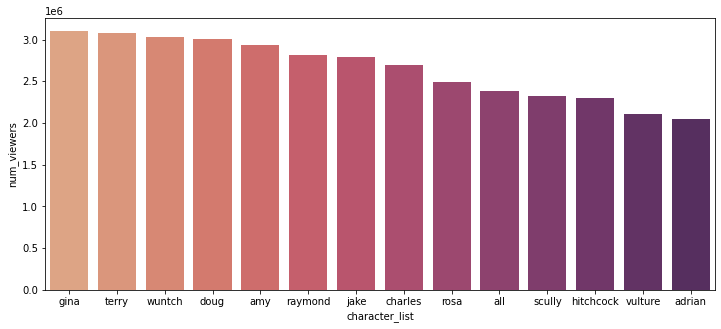

In [37]:
# lets visualize this 

fig_dims = (12, 5)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x = "character_list", y = "num_viewers", data = averages, palette = "flare", \
            ax=ax, order = averages.sort_values("num_viewers", ascending = False).character_list)

Well lookie here, looks like episodes with Gina get the most viewership when compared to the rest of the characters. Even shows with the whole squad seem to be pretty low on the spectrum.

And Adrian seems the least popular... and weirdly enough, the main character, Jake, falls somewhere in between the rest.

<AxesSubplot:xlabel='character_list', ylabel='imdb_rating'>

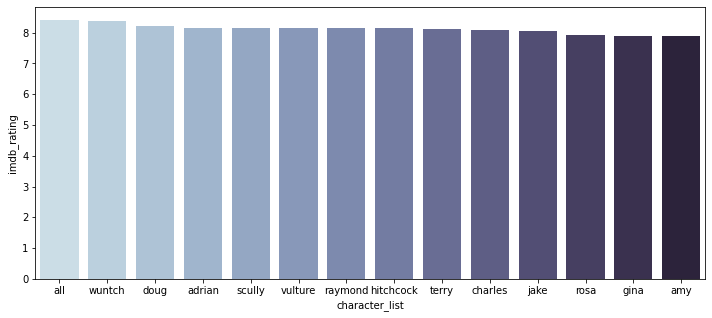

In [38]:
# lets look at the imdb_ratings for the characters 

fig_dims = (12, 5)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x = "character_list", y = "imdb_rating", data = averages, palette = "ch:s=.25,rot=-.25", \
            ax=ax, order = averages.sort_values("imdb_rating", ascending = False).character_list)

So i guess my "hypothesis" that the most viewed episodes are the "squad" episodes isnt exactly right...oh well

![SegmentLocal](brooklyn99-brooklyn-nine-nine.gif "segment")

[Image Source](https://www.google.com/url?sa=i&url=https%3A%2F%2Fdeadline.com%2F2018%2F05%2Fbrooklyn-nine-nine-cast-seth-meyers-more-exult-over-nbc-pickup-1202389183%2F&psig=AOvVaw3vLvXGA8AroljR0VBH4yah&ust=1638934909040000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCND_ybri0PQCFQAAAAAdAAAAABAD)